<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/PROYECTO__ATDM_JobBank__2_An%C3%A1lisis_descriptivo_b%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1 .- SE CARGA LOS DATOS WEB SCRAPING DE JOBBANK


In [3]:

from google.colab import files
uploaded=files.upload()

Saving JobBank_list_jobs.csv to JobBank_list_jobs.csv


In [5]:
# Import pandas
import pandas as pd
df1 = pd.read_csv("JobBank_list_jobs.csv")
df1.head(1000)

,Unnamed: 0,titulo,NOC,fecha_post,compania,locacion,salario,tipo_contrato,vacantes,JobBank_id,idioma,educacion,experiencia,responsabilidades,links_secciones
0,0,tire technician\n\t\t\t\t,NOC 74203,"Posted on April 29, 2023\n\t\t\t",\n\nTIRE PIRATES INC\n\n\n,AB,$17.00 to $25.00HOUR hourly (to be negotiated),Full time,NaN,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",English,"\n\n\nNo degree, certificate or diploma\n\n",\n\n1 year to less than 2 years\n,\nResponsibilities\nTasks\n\n\nAdd or replace ...,https://www.jobbank.gc.ca/jobsearch/jobposting...
1,1,food service supervisor\n\t\t\t\t,NOC 62020,"Posted on April 29, 2023\n\t\t\t",\n\nJBS Kerala Kitchen Inc.\n\n,ON,$17.00HOUR hourly,Full time,NaN,"\nLocationScarborough, ON\n",English,\n\n\nSecondary (high) school graduation certi...,\n\n1 year to less than 2 years\n,\nResponsibilities\nTasks\n\n\nEstablish metho...,https://www.jobbank.gc.ca/jobsearch/jobposting...
2,2,cook\n\t\t\t\t,NOC 63200,"Posted on April 29, 2023\n\t\t\t",\n\nJBS Kerala Kitchen Inc.\n\n,ON,$17.00HOUR hourly,Full time,NaN,"\nLocationScarborough, ON\n",English,\n\n\nSecondary (high) school graduation certi...,\n\n1 year to less than 2 years\n,\nResponsibilities\nTasks\n\n\nPrepare and coo...,https://www.jobbank.gc.ca/jobsearch/jobposting...
3,3,"operator, forklift\n\t\t\t\t",NOC 75101,"Posted on April 24, 2023\n\t\t\t",\n\nS&S Instant Jobs Inc.\n\n,ON,$18.00 to $19.00HOUR hourly,Full time,NaN,"\nLocationMississauga, ON\n",NaN,NaN,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...
4,4,beautician\n\t\t\t\t,NOC 63211,"Posted on March 30, 2023\n\t\t\t",\n\nThe Spa @Vivacious\n\n,ON,$15.50 to $60.00HOUR hourly,Full time,NaN,"\nLocationTrenton, ON\n",NaN,NaN,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,497,research assistant - generalist (except univer...,NOC 12113,"Posted on April 17, 2023\n\t\t\t",\n\nMedical Techniques Inc.\n\n,ON,$29.00HOUR hourly,Full time,NaN,"\nLocationRichmond Hill, ON\n",NaN,NaN,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...
498,498,retail store supervisor\n\t\t\t\t,NOC 62010,"Posted on April 03, 2023\n\t\t\t",\n\nOakwood Grocery\n\n,ON,$18.00HOUR hourly,Full time,NaN,"\nLocationOakwood, ON\n",NaN,NaN,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...
499,499,housekeeping room attendant\n\t\t\t\t,NOC 65310,"Posted on March 14, 2023\n\t\t\t",\n\nDelta Hotel by Marriott Dartmouth\n\n,NS,Full time,Full time,NaN,"\nLocationDartmouth, NS\n",NaN,NaN,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...
500,500,"cleaner, window\n\t\t\t\t",NOC 65311,"Posted on April 17, 2023\n\t\t\t",\n\nCapital Windows & Snow\n\n,AB,$20.00 to $30.00HOUR hourly,Full time,NaN,"\nLocationEdmonton, AB\n",NaN,NaN,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...


# 2.- SE CARGA DATOS EXTERNOS LABORALES DE CANADA


In [ ]:
from google.colab import files
uploaded=files.upload()

In [135]:
df2 = pd.read_csv("Datos_Externos.csv",sep=';')
df2.head(3)

,Provincia - Territorio,locacion,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo
0,Ontario,ON,16711229,0.38,14.8,15.0,0.004,100000
1,Quebec,QC,8164361,0.23,6.0,12.0,0.046,230000
2,British Columbia,BC,5000879,0.13,5.0,13.0,0.053,450000



#3.-SE CARGA otros DATOS EXTERNOS LABORALES DE CANADA (NOC)

In [136]:
from google.colab import files
uploaded=files.upload()

Saving NOC.csv to NOC.csv


In [137]:
df4 = pd.read_csv("NOC.csv",sep=";")
df4.head(3)

,NOC,TEER_Category,Class_title,Occupation_types
0,NOC 10010,0,Financial managers,Management occupations
1,NOC 10010,0,Financial managers,Management occupations
2,NOC 10011,0,Human resources managers,Management occupations


Organizando el Dataframe del webscraping, quitando caracter especiales:

In [207]:
df1["titulo"] = df1["titulo"].replace({'\n\t\t\t\t':''}, regex=True)
df1["fecha_post"] = df1["fecha_post"].replace({'\n\t\t\t':''}, regex=True)
df1["fecha_post"] = df1["fecha_post"].replace({'Posted on':''}, regex=True)
df1["compania"] = df1["compania"].replace({'\n\n':''}, regex=True)
df1["salario"]=df1.salario.str.extract('(\d+(?:\.\d+)?)')
df1["experiencia"]=df1.experiencia.str.extract('(\d+)')

SE GENERA UN MERGE ENTRE EL DATAFRAME DE WEPSCRAPING CON LOS DATOS EXÓGENOS

In [283]:
df3 = pd.merge(df1,df2, on ="locacion")
df3.head(3)

,Unnamed: 0,titulo,NOC,fecha_post,compania,locacion,salario,tipo_contrato,vacantes,JobBank_id,...,experiencia,responsabilidades,links_secciones,Provincia - Territorio,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo
0,0,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,NaN,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,1,\nResponsibilities\nTasks\n\n\nAdd or replace ...,https://www.jobbank.gc.ca/jobsearch/jobposting...,Alberta,4067175,0.12,6.4,14.0,0.073,610000
1,7,line cook,NOC 63200,"March 26, 2023",The Bank and Baron PUB,AB,15,Full time,NaN,"\nLocationCalgary, AB\n",...,NaN,NaN,https://www.jobbank.gc.ca/jobsearch/jobposting...,Alberta,4067175,0.12,6.4,14.0,0.073,610000
2,18,construction engineering technician,NOC 22300,"April 29, 2023",MVA Power Engineering Consulting Ltd.,AB,30,Full time,NaN,"\nLocation1353 Cunningham Dr SWEdmonton, ABT6W...",...,7,\nResponsibilities\nTasks\n\n\nParticipate in ...,https://www.jobbank.gc.ca/jobsearch/jobposting...,Alberta,4067175,0.12,6.4,14.0,0.073,610000


SE GENERA UN MERGE ENTRE EL DATAFRAME DE df3 CON LOS DATOS EXÓGENOS NOC

In [284]:
df = pd.merge(df3,df4, on ="NOC")
df.head(3)

,Unnamed: 0,titulo,NOC,fecha_post,compania,locacion,salario,tipo_contrato,vacantes,JobBank_id,...,Provincia - Territorio,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category,Class_title,Occupation_types
0,0,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,NaN,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,Occupations that usually require
1,0,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,NaN,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,"a high school diploma, or"
2,0,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,NaN,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,several weeks of on-the-job training


##Limpieza de datos:

In [285]:
df.columns.to_list()  ## Nombres de las columnas

['Unnamed: 0',
 'titulo',
 'NOC',
 'fecha_post',
 'compania',
 'locacion',
 'salario',
 'tipo_contrato',
 'vacantes',
 'JobBank_id',
 'idioma',
 'educacion',
 'experiencia',
 'responsabilidades',
 'links_secciones',
 'Provincia - Territorio',
 'Poblacion 2016',
 '% aproximado de la poblacion nacional',
 'Densidad de poblacion (hab - hm2)',
 'Salario Min',
 'Desempleo %',
 'Puestos de trabajo',
 'TEER_Category',
 'Class_title',
 'Occupation_types']

Quitar Columnas que no hacen parte del DataFrame Final

In [286]:
del(df['Unnamed: 0'])

Detección datos nulos

In [287]:
#Si lo prefieres puedes usar:
df["salario"]=df["salario"].fillna(method="bfill")
df["vacantes"]=df["vacantes"].fillna(value=1)
df["idioma"]=df["idioma"].fillna(value="English")
df["experiencia"]=df["experiencia"].fillna(value=1)
df

,titulo,NOC,fecha_post,compania,locacion,salario,tipo_contrato,vacantes,JobBank_id,idioma,...,Provincia - Territorio,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category,Class_title,Occupation_types
0,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,1.0,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",English,...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,Occupations that usually require
1,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,1.0,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",English,...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,"a high school diploma, or"
2,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17,Full time,1.0,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",English,...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,several weeks of on-the-job training
3,automotive window tint installer,NOC 74203,"April 03, 2023",Ultimate Auto Protection Inc.,AB,18,Full time,1.0,"\nLocationCalgary, AB\n",English,...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,Occupations that usually require
4,automotive window tint installer,NOC 74203,"April 03, 2023",Ultimate Auto Protection Inc.,AB,18,Full time,1.0,"\nLocationCalgary, AB\n",English,...,Alberta,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,"a high school diploma, or"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,pharmacy technician,NOC 32124,"April 07, 2023",Murphy's Pharmacies PEI,PE,29,Full time,1.0,"\nLocationCharlottetown, PE\n",English,...,Prince Edward Island,159625,0.41,25.1,16.8,0.066,1660000,2,Pharmacy technicians,a college diploma
1566,pharmacy technician,NOC 32124,"April 07, 2023",Murphy's Pharmacies PEI,PE,29,Full time,1.0,"\nLocationCharlottetown, PE\n",English,...,Prince Edward Island,159625,0.41,25.1,16.8,0.066,1660000,2,Pharmacy technicians,"apprenticeship training of 2 or more years, or"
1567,pharmacy technician,NOC 32124,"April 07, 2023",Murphy's Pharmacies PEI,PE,29,Full time,1.0,"\nLocationCharlottetown, PE\n",English,...,Prince Edward Island,159625,0.41,25.1,16.8,0.066,1660000,2,Pharmacy technicians,supervisory occupations
1568,"testing, adjusting and balancing (tab) technic...",NOC 11201,"March 25, 2023",Down Home HVAC Ltd.,NL,29,Full time,1.0,"\nLocationMount Pearl, NL\n",English,...,Newfoundland and Labrador,519716,0.02,1.4,16.4,0.062,1485000,1,Professional occupations in business managemen...,Occupations that usually require a university ...


Pasar a numero "salario" y "experiencia"

In [288]:
df.dtypes

titulo                                    object
NOC                                       object
fecha_post                                object
compania                                  object
locacion                                  object
salario                                   object
tipo_contrato                             object
vacantes                                 float64
JobBank_id                                object
idioma                                    object
educacion                                 object
experiencia                               object
responsabilidades                         object
links_secciones                           object
Provincia - Territorio                    object
Poblacion 2016                             int64
% aproximado de la poblacion nacional    float64
Densidad de poblacion (hab - hm2)        float64
Salario Min                              float64
Desempleo %                              float64
Puestos de trabajo  

In [289]:
df['salario'] = df['salario'].astype('int64')
df['experiencia'] = df['experiencia'].astype('int64')

Se verifica:

In [290]:
df.dtypes

titulo                                    object
NOC                                       object
fecha_post                                object
compania                                  object
locacion                                  object
salario                                    int64
tipo_contrato                             object
vacantes                                 float64
JobBank_id                                object
idioma                                    object
educacion                                 object
experiencia                                int64
responsabilidades                         object
links_secciones                           object
Provincia - Territorio                    object
Poblacion 2016                             int64
% aproximado de la poblacion nacional    float64
Densidad de poblacion (hab - hm2)        float64
Salario Min                              float64
Desempleo %                              float64
Puestos de trabajo  

Organizar unidades de todas las variables : "salario unificarlo a horas" y "experiencia en meses"

In [332]:
df['salario'] = df['salario'].where(df['salario'] < 125,)
df['experiencia'] = df['experiencia'].where(df['experiencia'] < 3)

  

In [333]:
#Se guarda el dataframe en un archivo csv
df.to_csv('JobBank_Final.csv')

## **Análisis descriptivo básico**

In [334]:
# Determina el número de registros y columnas del conjunto de datos
df.shape

(1570, 24)

In [335]:
#df.describe()
round(df.describe(),3) ## análisis descriptivo básico: cantidad, media, desviación estándar, mínimo, máximo, cuartiles

,salario,vacantes,experiencia,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category
count,1570.000,1570.0,1517.000,1.570000e+03,1570.000,1570.000,1570.000,1570.000,1570.000,1570.000
mean,27.976,1.0,1.083,8.533135e+06,0.212,8.994,14.265,0.037,450152.866,2.690
std,17.175,0.0,0.276,6.327982e+06,0.138,5.354,1.175,0.027,376627.138,1.272
min,13.000,1.0,1.000,3.587400e+04,0.020,0.080,12.000,0.004,100000.000,0.000
25%,17.000,1.0,1.000,4.067175e+06,0.120,5.000,13.000,0.004,100000.000,2.000
50%,21.000,1.0,1.000,5.000879e+06,0.130,6.400,15.000,0.050,450000.000,2.000
75%,32.000,1.0,1.000,1.671123e+07,0.380,14.800,15.000,0.053,610000.000,4.000
max,115.000,1.0,2.000,1.671123e+07,0.410,25.100,18.000,0.078,2185000.000,5.000


In [336]:
df.skew() ## Sesgadez o asimetría

<ipython-input-336-3556dfc42ae3>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew() ## Sesgadez o asimetría


salario                                  2.281879
vacantes                                 0.000000
experiencia                              3.024624
Poblacion 2016                           0.367835
% aproximado de la poblacion nacional    0.215628
Densidad de poblacion (hab - hm2)        0.437612
Salario Min                             -0.210632
Desempleo %                             -0.245467
Puestos de trabajo                       1.342795
TEER_Category                            0.185621
dtype: float64

In [337]:
df.kurt() ## Curtosis

<ipython-input-337-a66f8832f774>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt() ## Curtosis


salario                                  6.212225
vacantes                                 0.000000
experiencia                              7.157788
Poblacion 2016                          -1.581635
% aproximado de la poblacion nacional   -1.585360
Densidad de poblacion (hab - hm2)       -0.886610
Salario Min                             -0.506913
Desempleo %                             -1.559618
Puestos de trabajo                       2.293800
TEER_Category                           -0.394349
dtype: float64

### **Impresión de la sesgadez y la curtosis de la variable salario**

In [338]:
print('La curtosis de la variable salario es:{}'.format(round(df["salario"].kurt(),3)))
print('La sesgadez de la variable salario es: {}'.format(round(df["salario"].skew(),3)))

La curtosis de la variable salario es:6.212
La sesgadez de la variable salario es: 2.282


In [339]:
print('La curtosis de la variable salario es:{}'.format(round(df["salario"].kurt(),3)))
print('La sesgadez de la variable salario es: {}'.format(round(df["salario"].skew(),3)))

La curtosis de la variable salario es:6.212
La sesgadez de la variable salario es: 2.282


## **Recodificación de variables**

Dado que las variables provincia, idioma, NOC y TEER_Category las está interpretando como variables cuantitativas las vamos a recodificar a variables cualitativas

In [340]:
df.locacion.value_counts()

ON    558
BC    381
AB    234
SK    150
QC    114
NS     34
NB     32
MB     32
PE     19
YT      8
NL      8
Name: locacion, dtype: int64

In [341]:
df["locacion"]=df["locacion"].replace(["ON","QC","BC","AB","MB","SK","NS","NB","NL","PE","NT","NU","YT"],[1,2,3,4,5,6,7,8,9,10,11,12,13])

In [342]:
df.locacion.value_counts()

1     558
3     381
4     234
6     150
2     114
7      34
8      32
5      32
10     19
13      8
9       8
Name: locacion, dtype: int64

In [343]:
df.idioma.value_counts()

English              1561
English or French       7
French                  2
Name: idioma, dtype: int64

In [344]:
df.NOC.value_counts()

NOC 62020    108
NOC 63200     96
NOC 64100     60
NOC 62200     52
NOC 73300     44
            ... 
NOC 31302      2
NOC 31121      2
NOC 31110      2
NOC 31204      2
NOC 11201      2
Name: NOC, Length: 149, dtype: int64

In [345]:
df.TEER_Category.value_counts()

2    672
3    304
4    246
5    178
1     94
0     76
Name: TEER_Category, dtype: int64

In [346]:
df.describe()

,locacion,salario,vacantes,experiencia,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category
count,1570.000000,1570.000000,1570.0,1517.000000,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000,1.570000e+03,1570.000000
mean,3.047771,27.975796,1.0,1.083059,8.533135e+06,0.211503,8.993592,14.264841,0.037369,4.501529e+05,2.690446
std,2.174277,17.174638,0.0,0.276062,6.327982e+06,0.137559,5.353502,1.175206,0.026751,3.766271e+05,1.272235
min,1.000000,13.000000,1.0,1.000000,3.587400e+04,0.020000,0.080000,12.000000,0.004000,1.000000e+05,0.000000
25%,1.000000,17.000000,1.0,1.000000,4.067175e+06,0.120000,5.000000,13.000000,0.004000,1.000000e+05,2.000000
50%,3.000000,21.000000,1.0,1.000000,5.000879e+06,0.130000,6.400000,15.000000,0.050000,4.500000e+05,2.000000
75%,4.000000,32.000000,1.0,1.000000,1.671123e+07,0.380000,14.800000,15.000000,0.053000,6.100000e+05,4.000000
max,13.000000,115.000000,1.0,2.000000,1.671123e+07,0.410000,25.100000,18.000000,0.078000,2.185000e+06,5.000000


## **Definición de variables cuantitativas y cualitativas**

In [347]:
df['salario'] = pd.to_numeric(df['salario'],errors='coerce')

In [348]:
df['salario']

0       17
1       17
2       17
3       18
4       18
        ..
1565    29
1566    29
1567    29
1568    29
1569    29
Name: salario, Length: 1570, dtype: int64

In [349]:
## Variables del conjunto de datos
df.columns

Index(['titulo', 'NOC', 'fecha_post', 'compania', 'locacion', 'salario',
       'tipo_contrato', 'vacantes', 'JobBank_id', 'idioma', 'educacion',
       'experiencia', 'responsabilidades', 'links_secciones',
       'Provincia - Territorio', 'Poblacion 2016',
       '% aproximado de la poblacion nacional',
       'Densidad de poblacion (hab - hm2)', 'Salario Min', 'Desempleo %',
       'Puestos de trabajo', 'TEER_Category', 'Class_title',
       'Occupation_types'],
      dtype='object')

In [350]:
## Variables cualitativas
cualitativas=['titulo','NOC','fecha_post','compania','locacion','tipo_contrato','JobBank_id','idioma','educacion','responsabilidades','links_secciones','Provincia - Territorio','TEER_Category','Class_title','Occupation_types']
display(cualitativas)

['titulo',
 'NOC',
 'fecha_post',
 'compania',
 'locacion',
 'tipo_contrato',
 'JobBank_id',
 'idioma',
 'educacion',
 'responsabilidades',
 'links_secciones',
 'Provincia - Territorio',
 'TEER_Category',
 'Class_title',
 'Occupation_types']

In [351]:
## Variables cuantitativas
cuantitativas=df.columns.drop(cualitativas)
display(cuantitativas)


Index(['salario', 'vacantes', 'experiencia', 'Poblacion 2016',
       '% aproximado de la poblacion nacional',
       'Densidad de poblacion (hab - hm2)', 'Salario Min', 'Desempleo %',
       'Puestos de trabajo'],
      dtype='object')

## **Análisis estadístico de variables cuantitativas**

In [352]:
## Análisis descriptivo básico
df[cuantitativas].describe()

,salario,vacantes,experiencia,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo
count,1570.000000,1570.0,1517.000000,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000,1.570000e+03
mean,27.975796,1.0,1.083059,8.533135e+06,0.211503,8.993592,14.264841,0.037369,4.501529e+05
std,17.174638,0.0,0.276062,6.327982e+06,0.137559,5.353502,1.175206,0.026751,3.766271e+05
min,13.000000,1.0,1.000000,3.587400e+04,0.020000,0.080000,12.000000,0.004000,1.000000e+05
25%,17.000000,1.0,1.000000,4.067175e+06,0.120000,5.000000,13.000000,0.004000,1.000000e+05
50%,21.000000,1.0,1.000000,5.000879e+06,0.130000,6.400000,15.000000,0.050000,4.500000e+05
75%,32.000000,1.0,1.000000,1.671123e+07,0.380000,14.800000,15.000000,0.053000,6.100000e+05
max,115.000000,1.0,2.000000,1.671123e+07,0.410000,25.100000,18.000000,0.078000,2.185000e+06


In [353]:
### Coeficiente de asimetría
pd.DataFrame(df.skew()).T

<ipython-input-353-a2cf8a12fd4a>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.skew()).T


,locacion,salario,vacantes,experiencia,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category
0,1.323639,2.281879,0.0,3.024624,0.367835,0.215628,0.437612,-0.210632,-0.245467,1.342795,0.185621


In [354]:
### Coeficiente de curtosis
pd.DataFrame(df.kurt()).T

<ipython-input-354-38bba7ba0d38>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.kurt()).T


,locacion,salario,vacantes,experiencia,Poblacion 2016,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category
0,2.217384,6.212225,0.0,7.157788,-1.581635,-1.58536,-0.88661,-0.506913,-1.559618,2.2938,-0.394349


### **Análisis gráfico de las variables cuantitativas**

In [355]:
import pandas as pd ## Manejo de DataFrames, que son el insumo principal del análisis estadístico
import numpy as np ## Cálculo científico, calculadora científica
import matplotlib.pyplot as plt ## Gráficos básicos
import seaborn as sns ## Gráficos avanzados

#### **Diagramas de cajas**

<Axes: >

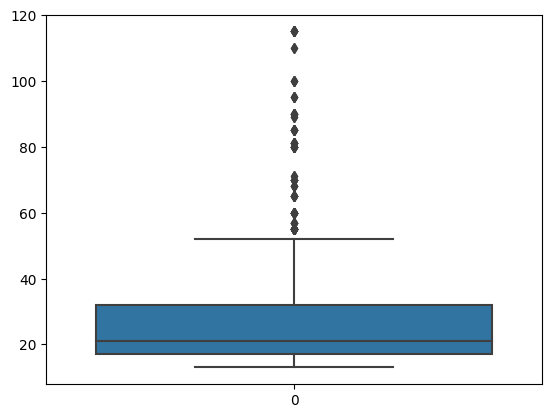

In [356]:
# Diagrama de cajas o boxplot de la variable salario
sns.boxplot(data=df["salario"])

Como la variable ingresos tiene valores atípicos anormales se va a realizar el análisis sin estos. Por tanto, se calculan el primer cuartil, el tercero  y el recorrido intercuartil de esta variable. 

In [357]:
q1 = df.salario.quantile(0.25)   #Cálculo del primer cuartil
q3 = df.salario.quantile(0.75)   #Cáculo del tercer cuartil
RIQ = q3-q1                            #Recorrido intercuantil
ati_inf= q1-1.5*RIQ                    #límite superior de los atípicos inferiores
ati_sup= q3+1.5*RIQ                    #límite inferior de los atípicos superiores 
ati_anor_inf = q1-3*RIQ                #límite superior de los atípicos anormales inferiores
ati_anor_sup = q3+3*RIQ                #límite inferior de los atípicos anormales superiores

print("El primer cuartil de la variable ingresos es {}".format(round(q1,3)))
print("El tercer cuartil de la variable ingresos es {}".format(round(q3,3)))
print("El recorrido intercuartil de la variable ingresos es {}".format(round(RIQ,3)))
print("El límite superior de los atípicos inferiores es {}".format(round(ati_inf,3)))
print("El límite inferior de los atípicos superiores es {}".format(round(ati_sup,3)))
print("El límite inferior de los atípicos anormales superiores es {}".format(round(ati_anor_sup,3)))
print("El límite superior de los atípicos anormales inferiores es {}".format(round(ati_anor_inf,3)))
print("\nDado que el límite superior de los atípicos anormales inferiores es negativo \ny la varible ingreso sólo toma valores positivos no hay valores atípicos inferiores.\nPor tanto, sólo se hará el análisis con las valores menores al límite inferior de los atípicos anormales superiroes")


El primer cuartil de la variable ingresos es 17.0
El tercer cuartil de la variable ingresos es 32.0
El recorrido intercuartil de la variable ingresos es 15.0
El límite superior de los atípicos inferiores es -5.5
El límite inferior de los atípicos superiores es 54.5
El límite inferior de los atípicos anormales superiores es 77.0
El límite superior de los atípicos anormales inferiores es -28.0

Dado que el límite superior de los atípicos anormales inferiores es negativo 
y la varible ingreso sólo toma valores positivos no hay valores atípicos inferiores.
Por tanto, sólo se hará el análisis con las valores menores al límite inferior de los atípicos anormales superiroes


In [358]:
##Cantidad de datos que no son atípicos anormales para el salario
print("Cantidad de datos que no son atípicos anormales para el salario")
print(df[df.salario<ati_anor_sup].shape)

##Cantidad de datos que son atípicos anormales para el salario
print("Cantidad de datos atípicos anormales para el salario")
print(df[df.salario>=ati_anor_sup].shape)

Cantidad de datos que no son atípicos anormales para el salario
(1518, 24)
Cantidad de datos atípicos anormales para el salario
(52, 24)


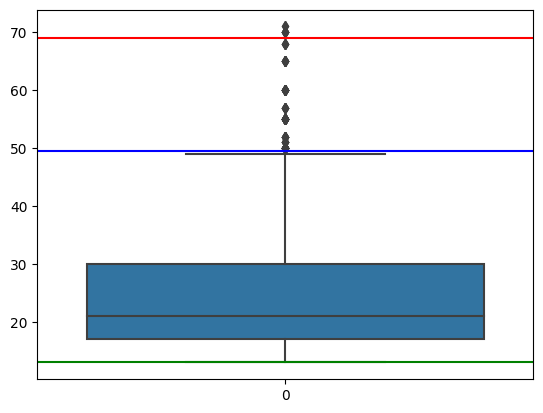

In [359]:
# Diagrama de cajas o boxplot de la variable salario
sns.boxplot(data=df[df.salario<ati_anor_sup]["salario"])
min_ing=min(df[df.salario<ati_anor_sup]["salario"])
q1=df[df.salario<ati_anor_sup]["salario"].quantile(0.25)
q3=df[df.salario<ati_anor_sup]["salario"].quantile(0.75)
RIQ=q3-q1
lim_ati=q3+1.5*RIQ
lim_ati_anor=q3+3*RIQ
plt.axhline(min_ing, color='g')
plt.axhline(lim_ati, color='b')
plt.axhline(lim_ati_anor, color='r')

In [360]:
q1 = df[df.salario<ati_anor_sup].salario.quantile(0.25)
q3 = df[df.salario<ati_anor_sup].salario.quantile(0.75)
RIQ = q3-q1
ati_anor_inf = q1-3*RIQ
ati_anor_sup = q3+3*RIQ
ati_inf = q1-1.5*RIQ
ati_sup = q3+1.5*RIQ
print("El primer cuartil de la variable salario es {}".format(round(q1,3)))
print("El tercer cuartil de la variable salario es {}".format(round(q3,3)))
print("El recorrido intercuartil de la variable salario es {}".format(round(RIQ,3)))
print("El límite inferior de los atípicos superiores es {}".format(round(ati_sup,3)))
print("El límite superior de los atípicos inferiores es {}".format(round(ati_inf,3)))
print("El límite inferior de los atípicos anormales superiores es {}".format(round(ati_anor_sup,3)))
print("El límite superior de los atípicos anormales inferiores es {}".format(round(ati_anor_inf,3)))
print("\nDado que el límite superior de los atípicos anormales inferiores es negativo \ny la varible salario sólo toma valores positivos no hay valores atípicos inferiores.\nPor tanto, sólo se hará el análisis con los valores menores al límite inferior de los atípicos anormales superiores")


El primer cuartil de la variable salario es 17.0
El tercer cuartil de la variable salario es 30.0
El recorrido intercuartil de la variable salario es 13.0
El límite inferior de los atípicos superiores es 49.5
El límite superior de los atípicos inferiores es -2.5
El límite inferior de los atípicos anormales superiores es 69.0
El límite superior de los atípicos anormales inferiores es -22.0

Dado que el límite superior de los atípicos anormales inferiores es negativo 
y la varible salario sólo toma valores positivos no hay valores atípicos inferiores.
Por tanto, sólo se hará el análisis con los valores menores al límite inferior de los atípicos anormales superiores


#### **Histograma*

In [361]:
print(df.salario.skew())
print(df.salario.kurt())

2.2818786119834495
6.2122251705431095


<Axes: xlabel='salario', ylabel='Count'>

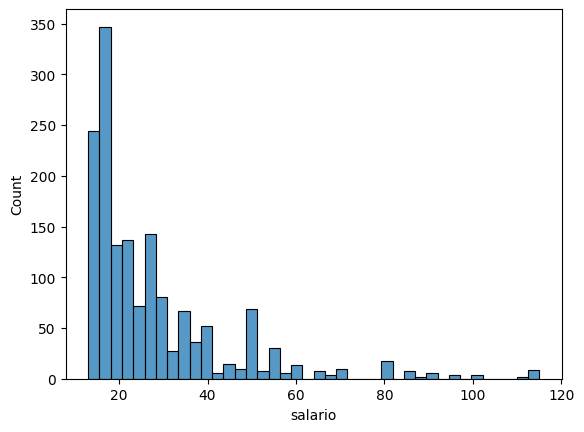

In [362]:
 sns.histplot(data=df["salario"])

<Axes: xlabel='salario', ylabel='Count'>

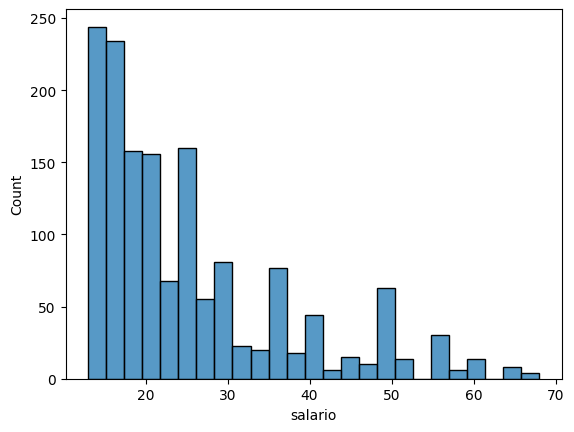

In [363]:
 sns.histplot(data=df[df.salario<ati_anor_sup]["salario"])

 sns.histplot(data=df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"])

<Axes: xlabel='salario', ylabel='Density'>

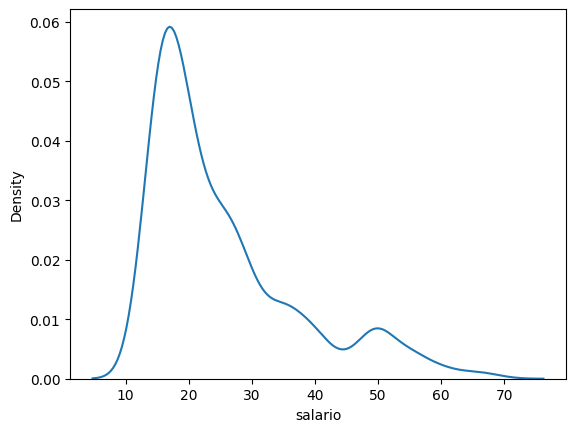

In [364]:
sns.kdeplot(data=df[df["salario"]<ati_anor_sup],x="salario")


Análisis gráfico de la variable Provincias "locacion"

<Axes: >

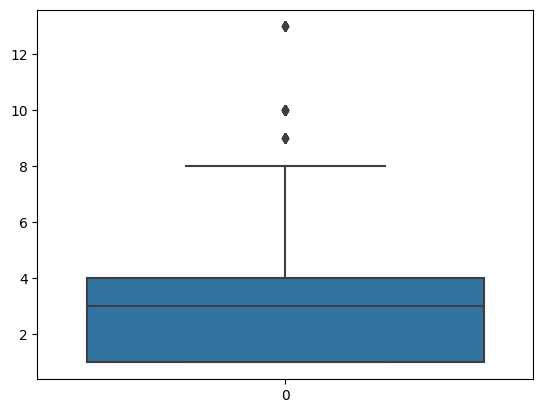

In [365]:
sns.boxplot(data=df[df.salario<ati_anor_sup]["locacion"])

In [366]:
df["locacion"]=df["locacion"].replace([1,2,3,4,5,6,7,8,9,10,11,12,13],["ON","QC","BC","AB","MB","SK","NS","NB","NL","PE","NT","NU","YT"])

<Axes: xlabel='locacion', ylabel='Count'>

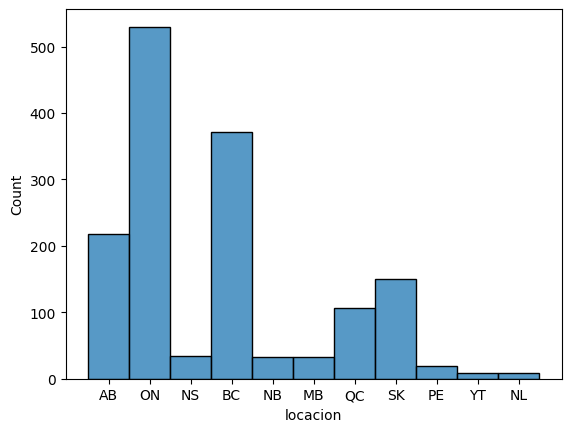

In [367]:
 sns.histplot(data=df[df.salario<ati_anor_sup]["locacion"])

#### **Diagramas de dispersión**

Diagrama de dispersión entre el salario y el idioma

No se evidencia ninguna relación entre el idioma y el salario


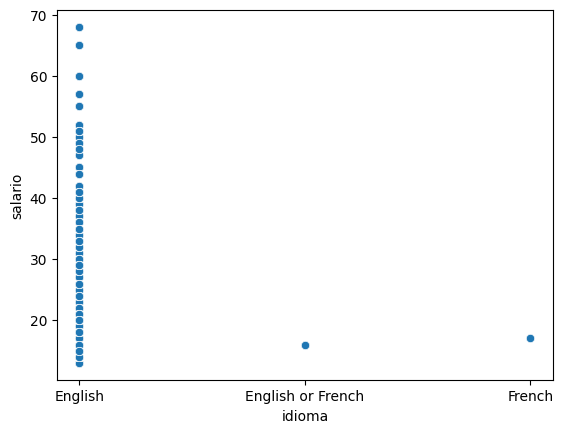

In [368]:
sns.scatterplot(data=df[df["salario"]<ati_anor_sup], x="idioma", y="salario")
print("No se evidencia ninguna relación entre el idioma y el salario")

Diagrama de dispersión entre el salario y el idioma separando los datos por provincia. Además, se presenta el diagrama de barras de la variable provincia. Se utiliza la función de varios gráficos en uno sólo.

In [369]:
df["locacion"]=df["locacion"].replace([1,2,3,4,5,6,7,8,9,10,11,12,13],["ON","QC","BC","AB","MB","SK","NS","NB","NL","PE","NT","NU","YT"])

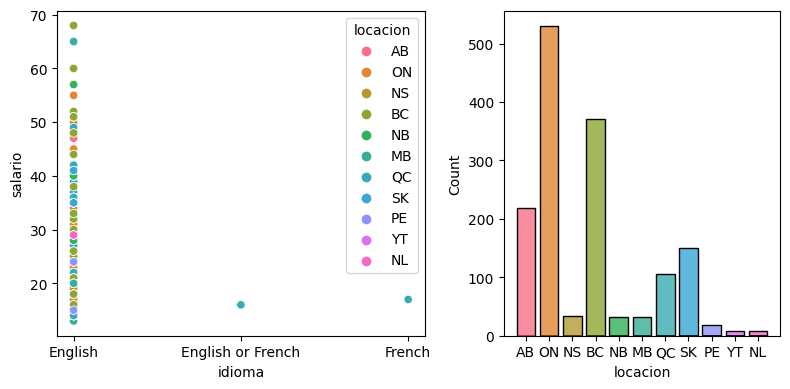

In [370]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df[df["salario"]<ati_anor_sup], x="idioma", y="salario", hue="locacion", ax=axs[0])

sns.histplot(data=df[df["salario"]<ati_anor_sup], x="locacion", hue="locacion", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

Diagrama de dispersión discriminando por Provincia y representación de las funciones de densidad para cada variable cuantitativa

TypeError: ignored

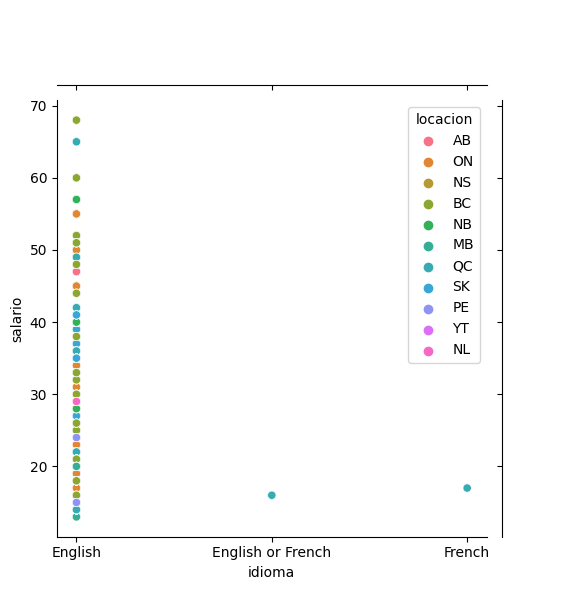

In [371]:
sns.jointplot(data=df[df["salario"]<ati_anor_sup], x="idioma", y="salario", hue="locacion")

Diagramas de dispersión del cruce de variables cuantitativas por Provincia

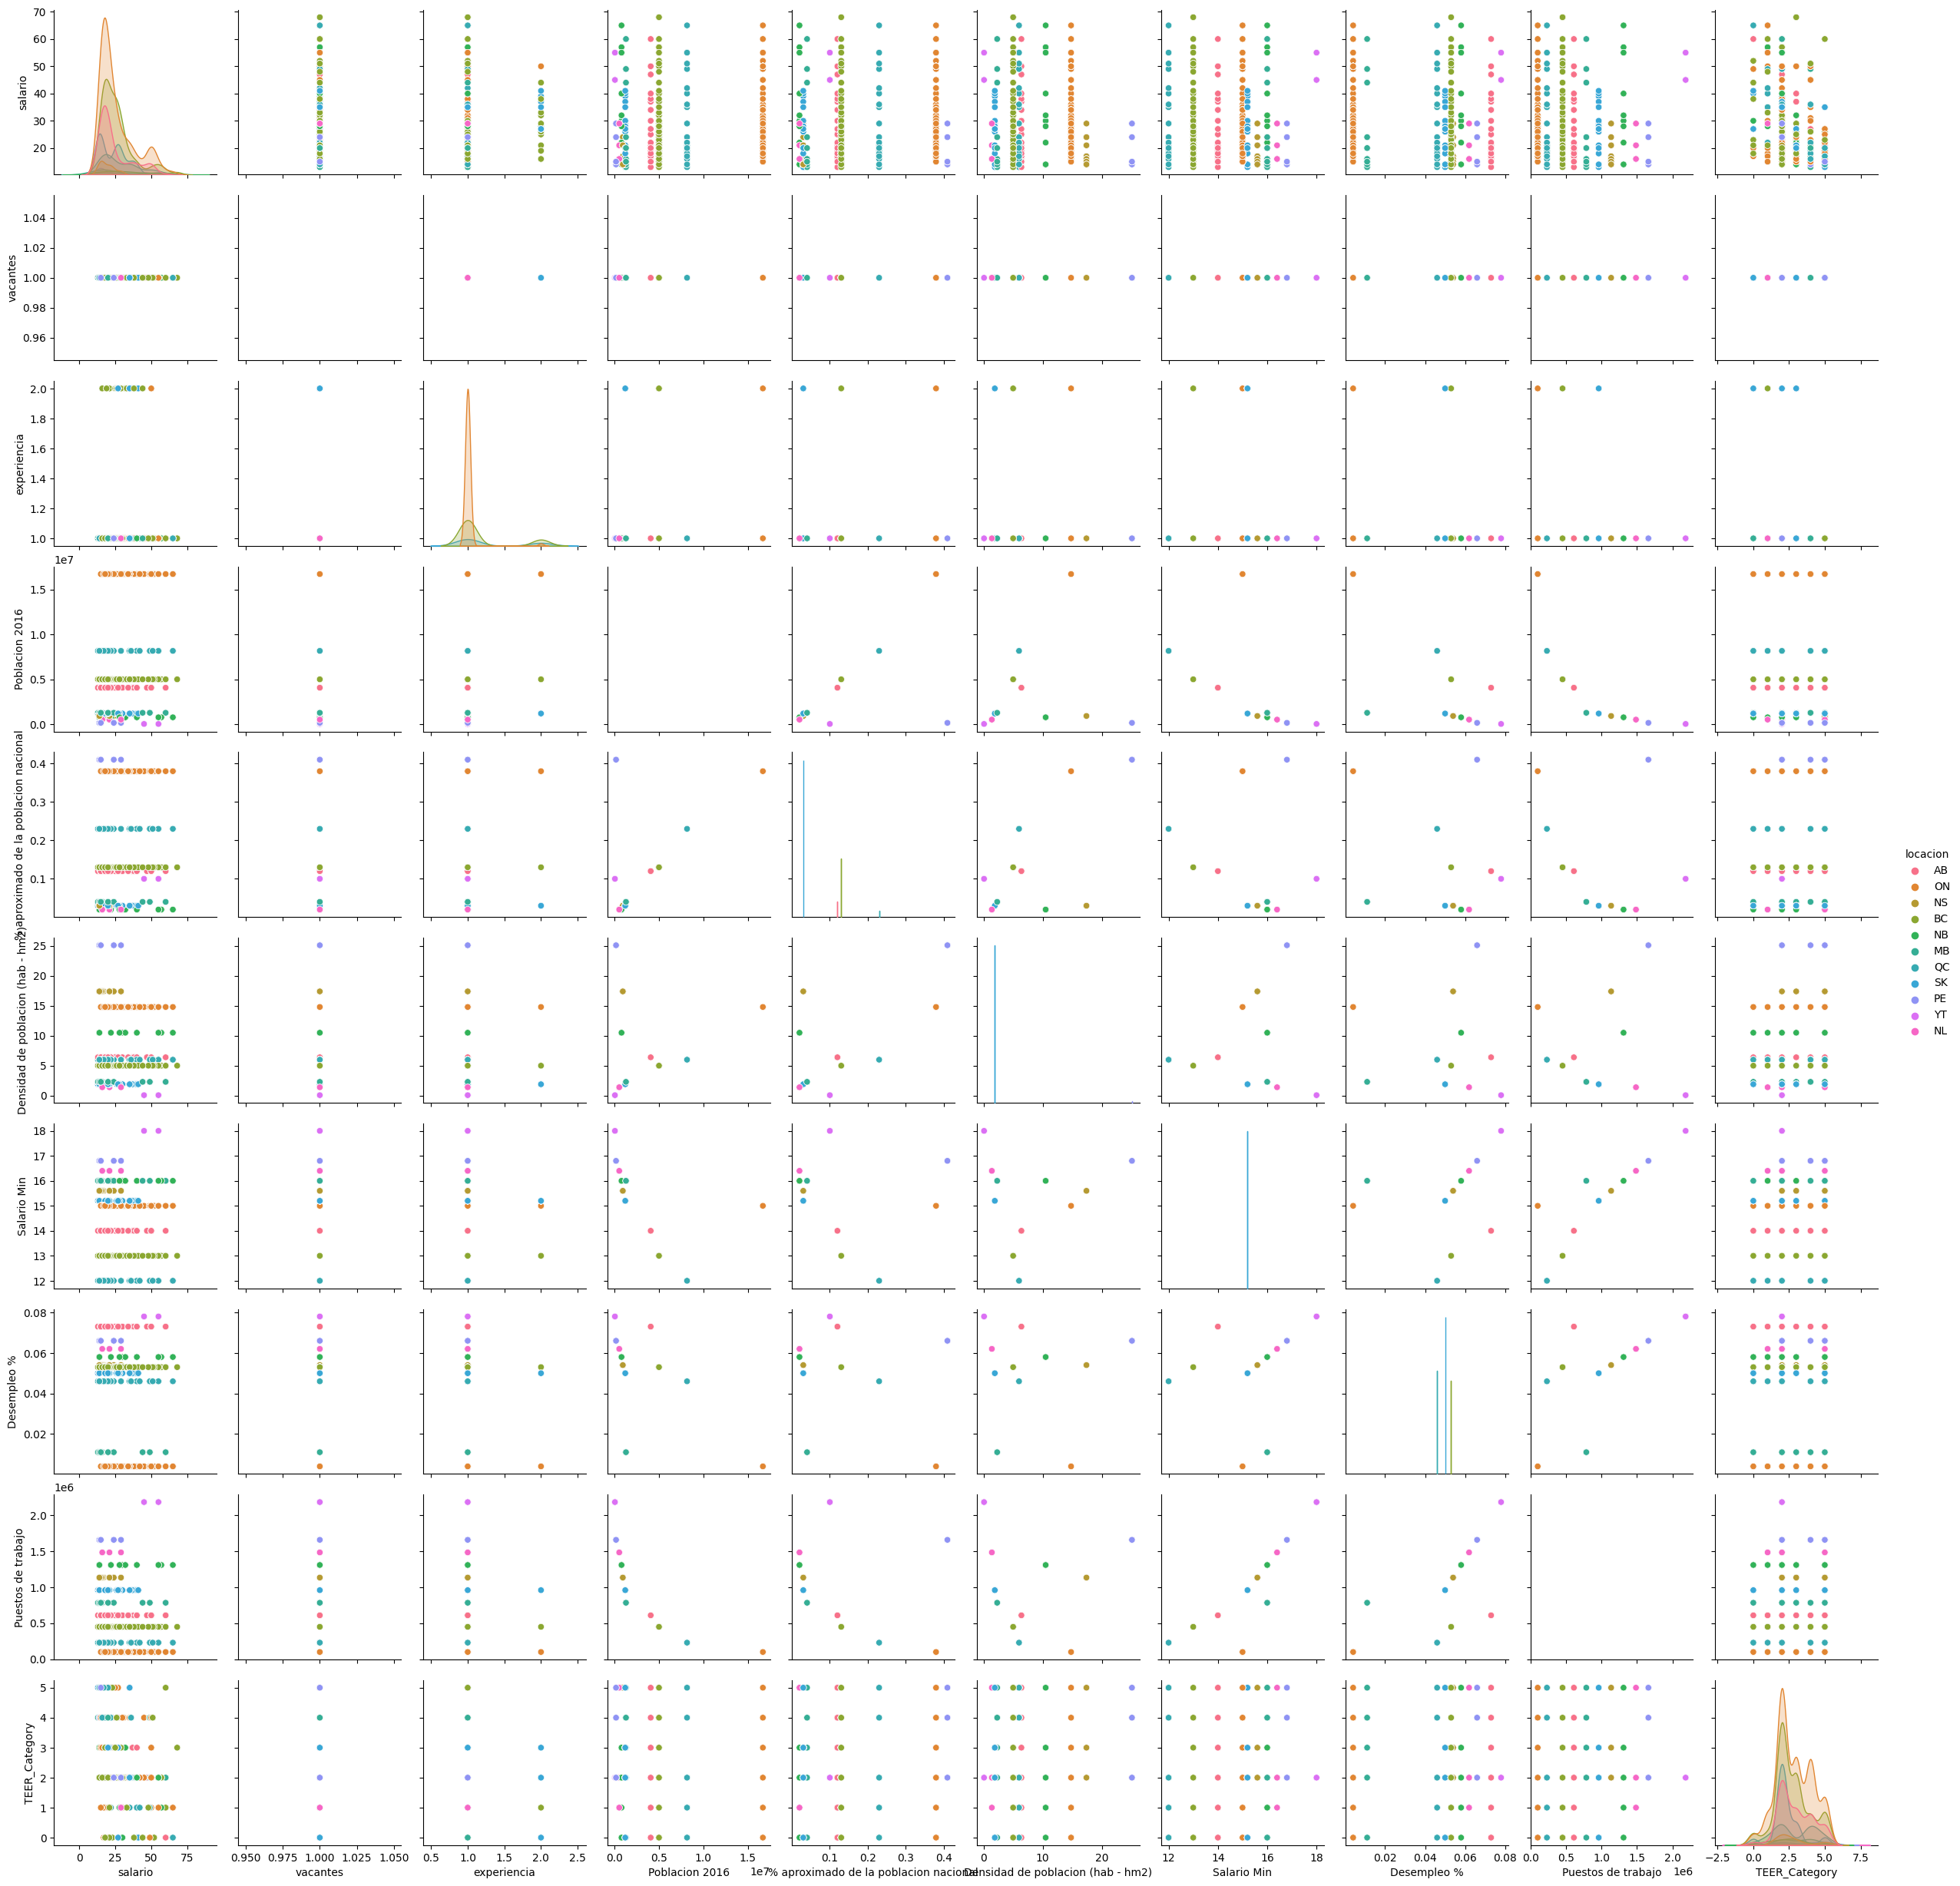

In [372]:
sns.pairplot(data=df[df["salario"]<ati_anor_sup], hue="locacion")



```
# Tiene formato de código
```



## **Análisis estadístico de variables cualitativas**

##### **Análisis de frecuencias absolutas**
Cantidad de individuos que se encuentran en cada clase

In [373]:
cualitativas 

['titulo',
 'NOC',
 'fecha_post',
 'compania',
 'locacion',
 'tipo_contrato',
 'JobBank_id',
 'idioma',
 'educacion',
 'responsabilidades',
 'links_secciones',
 'Provincia - Territorio',
 'TEER_Category',
 'Class_title',
 'Occupation_types']

In [374]:
df.locacion.value_counts()

ON    558
BC    381
AB    234
SK    150
QC    114
NS     34
NB     32
MB     32
PE     19
YT      8
NL      8
Name: locacion, dtype: int64

In [375]:
for i in cualitativas:
  print(
      "\n"+
      i)
  display(df[i].value_counts())


titulo


line cook                                                                                                 52
food service supervisor                                                                                   52
shift manager, fast food restaurant                                                                       40
driver, truck                                                                                             36
administrative assistant                                                                                  28
                                                                                                          ..
sommelier                                                                                                  2
kinesiologist                                                                                              2
maintenance planner                                                                                        2
property manager   


NOC


NOC 62020    108
NOC 63200     96
NOC 64100     60
NOC 62200     52
NOC 73300     44
            ... 
NOC 31302      2
NOC 31121      2
NOC 31110      2
NOC 31204      2
NOC 11201      2
Name: NOC, Length: 149, dtype: int64


fecha_post


  April 29, 2023       494
  April 28, 2023        90
  April 27, 2023        73
  April 26, 2023        73
  April 25, 2023        73
                      ... 
  January 29, 2023       2
  January 19, 2023       2
  January 21, 2023       2
  February 05, 2023      2
  March 25, 2023         2
Name: fecha_post, Length: 87, dtype: int64


compania


A & I Enterprises Ltd.\n             54
Skyline Drywall Ltd. \n              52
BURGER KING RESTAURANTS              44
SADIQ HOLDINGS INC. [BURGER KING]    40
Northern Rockies Lodge Ltd\n         13
                                     ..
KMC Mining                            2
Aeolus Freight Solutions Inc.         2
Sanderson Management Inc.             2
SHEIN                                 2
Down Home HVAC Ltd.                   2
Name: compania, Length: 419, dtype: int64


locacion


ON    558
BC    381
AB    234
SK    150
QC    114
NS     34
NB     32
MB     32
PE     19
YT      8
NL      8
Name: locacion, dtype: int64


tipo_contrato


Full time                         1343
Part time                          201
Part time leading to full time       6
Name: tipo_contrato, dtype: int64


JobBank_id


\nLocationSurrey, BC\n          110
\nLocationEdmonton, AB\n         77
\nLocationCalgary, AB\n          66
\nLocationToronto, ON\n          59
\nLocationKindersley, SK\n       56
                               ... 
\nLocationAcheson, AB\n           2
\nLocationMiramichi, NB\n         2
\nLocationPort Alberni, BC\n      2
\nLocationChatham-Kent, ON\n      2
\nLocationElmira, ON\n            2
Name: JobBank_id, Length: 236, dtype: int64


idioma


English              1561
English or French       7
French                  2
Name: idioma, dtype: int64


educacion


\n\n\nSecondary (high) school graduation certificate\n\n                                                                                 262
\n\n\nNo degree, certificate or diploma\n\n                                                                                               58
\n\n\nCollege/CEGEP\n\n                                                                                                                   48
\n\n\nBachelor's degree\n\n                                                                                                               14
\n\n\nOther trades certificate or diploma\n\n                                                                                              8
\n\n\nNo degree, certificate or diploma\n\n\n\nFull time enrollment\n\n                                                                    4
\n\n\nCollege, CEGEP or other non-university certificate or diploma from a program of 1 year to 2 years\n\nor equivalent experience\n      4
\n\n\nOther t


responsabilidades


\nResponsibilities\nTasks\n\n\nEstablish methods to meet work schedules\n\n\nSupervise and co-ordinate activities of staff who prepare and portion food\n\n\nTrain staff in job duties, sanitation and safety procedures\n\n\nEstimate and order ingredients and supplies\n\n\nHire food service staff\n\n\nEnsure food service and quality control\n\n\nAddress customers' complaints or concerns\n\n\nEstablish work schedules\n\n\nSupervision\n\n\n5-10 people\n\n\nFood service counter attendants and food preparers\n\n\nKitchen and food service helpers\n\n\n                                                                                                                       48
\nResponsibilities\nTasks\n\n\nSupervise and co-ordinate activities of staff who prepare and portion food\n\n\nTrain staff in job duties, sanitation and safety procedures\n\n\nEstimate and order ingredients and supplies\n\n\nHire food service staff\n\n\nEnsure food service and quality control\n\n\nAddress customers' complaints


links_secciones


https://www.jobbank.gc.ca/jobsearch/jobposting/38245019    4
https://www.jobbank.gc.ca/jobsearch/jobposting/38244713    4
https://www.jobbank.gc.ca/jobsearch/jobposting/38244990    4
https://www.jobbank.gc.ca/jobsearch/jobposting/38244987    4
https://www.jobbank.gc.ca/jobsearch/jobposting/38244984    4
                                                          ..
https://www.jobbank.gc.ca/jobsearch/jobposting/38245281    2
https://www.jobbank.gc.ca/jobsearch/jobposting/38245220    2
https://www.jobbank.gc.ca/jobsearch/jobposting/38244641    2
https://www.jobbank.gc.ca/jobsearch/jobposting/38244721    2
https://www.jobbank.gc.ca/jobsearch/jobposting/38244630    2
Name: links_secciones, Length: 500, dtype: int64


Provincia - Territorio


Ontario                      558
British Columbia             381
Alberta                      234
Saskatchewan                 150
Quebec                       114
Nova Scotia                   34
New Brunswick                 32
Manitoba                      32
Prince Edward Island          19
Yukon                          8
Newfoundland and Labrador      8
Name: Provincia - Territorio, dtype: int64


TEER_Category


2    672
3    304
4    246
5    178
1     94
0     76
Name: TEER_Category, dtype: int64


Class_title


Food service supervisors                                                       108
Cooks                                                                           96
Retail salespersons and visual merchandisers                                    60
Chefs                                                                           52
Transport truck drivers                                                         44
                                                                              ... 
Nurse practitioners                                                              2
Dietitians and nutritionists                                                     2
Dentists                                                                         2
Kinesiologists and other professional occupations in therapy and assessment      2
Professional occupations in business management consulting                       2
Name: Class_title, Length: 149, dtype: int64


Occupation_types


Occupations that usually require                                                       326
a college diploma                                                                      244
Occupations that usually need short-term work demonstration and no formal education    178
apprenticeship training of 2 or more years, or                                         168
supervisory occupations                                                                168
Occupations that usually require a university degree                                    94
a high school diploma, or                                                               82
several weeks of on-the-job training                                                    82
apprenticeship training of less than 2 years, or                                        76
more than 6 months of on-the-job training                                               76
Management occupations                                                                  76

##### **Análisis de frecuencias relativas**
Porcentaje de individuos que se encuentran en cada clase

In [376]:
for i in cualitativas:
  print("\n"+i)
  display(round(df[i].value_counts()/len(df[i]),2))


titulo


line cook                                                                                                 0.03
food service supervisor                                                                                   0.03
shift manager, fast food restaurant                                                                       0.03
driver, truck                                                                                             0.02
administrative assistant                                                                                  0.02
                                                                                                          ... 
sommelier                                                                                                 0.00
kinesiologist                                                                                             0.00
maintenance planner                                                                                       0.00
p


NOC


NOC 62020    0.07
NOC 63200    0.06
NOC 64100    0.04
NOC 62200    0.03
NOC 73300    0.03
             ... 
NOC 31302    0.00
NOC 31121    0.00
NOC 31110    0.00
NOC 31204    0.00
NOC 11201    0.00
Name: NOC, Length: 149, dtype: float64


fecha_post


  April 29, 2023       0.31
  April 28, 2023       0.06
  April 27, 2023       0.05
  April 26, 2023       0.05
  April 25, 2023       0.05
                       ... 
  January 29, 2023     0.00
  January 19, 2023     0.00
  January 21, 2023     0.00
  February 05, 2023    0.00
  March 25, 2023       0.00
Name: fecha_post, Length: 87, dtype: float64


compania


A & I Enterprises Ltd.\n             0.03
Skyline Drywall Ltd. \n              0.03
BURGER KING RESTAURANTS              0.03
SADIQ HOLDINGS INC. [BURGER KING]    0.03
Northern Rockies Lodge Ltd\n         0.01
                                     ... 
KMC Mining                           0.00
Aeolus Freight Solutions Inc.        0.00
Sanderson Management Inc.            0.00
SHEIN                                0.00
Down Home HVAC Ltd.                  0.00
Name: compania, Length: 419, dtype: float64


locacion


ON    0.36
BC    0.24
AB    0.15
SK    0.10
QC    0.07
NS    0.02
NB    0.02
MB    0.02
PE    0.01
YT    0.01
NL    0.01
Name: locacion, dtype: float64


tipo_contrato


Full time                         0.86
Part time                         0.13
Part time leading to full time    0.00
Name: tipo_contrato, dtype: float64


JobBank_id


\nLocationSurrey, BC\n          0.07
\nLocationEdmonton, AB\n        0.05
\nLocationCalgary, AB\n         0.04
\nLocationToronto, ON\n         0.04
\nLocationKindersley, SK\n      0.04
                                ... 
\nLocationAcheson, AB\n         0.00
\nLocationMiramichi, NB\n       0.00
\nLocationPort Alberni, BC\n    0.00
\nLocationChatham-Kent, ON\n    0.00
\nLocationElmira, ON\n          0.00
Name: JobBank_id, Length: 236, dtype: float64


idioma


English              0.99
English or French    0.00
French               0.00
Name: idioma, dtype: float64


educacion


\n\n\nSecondary (high) school graduation certificate\n\n                                                                                 0.17
\n\n\nNo degree, certificate or diploma\n\n                                                                                              0.04
\n\n\nCollege/CEGEP\n\n                                                                                                                  0.03
\n\n\nBachelor's degree\n\n                                                                                                              0.01
\n\n\nOther trades certificate or diploma\n\n                                                                                            0.01
\n\n\nNo degree, certificate or diploma\n\n\n\nFull time enrollment\n\n                                                                  0.00
\n\n\nCollege, CEGEP or other non-university certificate or diploma from a program of 1 year to 2 years\n\nor equivalent experience\n    0.00
\n\n\n


responsabilidades


\nResponsibilities\nTasks\n\n\nEstablish methods to meet work schedules\n\n\nSupervise and co-ordinate activities of staff who prepare and portion food\n\n\nTrain staff in job duties, sanitation and safety procedures\n\n\nEstimate and order ingredients and supplies\n\n\nHire food service staff\n\n\nEnsure food service and quality control\n\n\nAddress customers' complaints or concerns\n\n\nEstablish work schedules\n\n\nSupervision\n\n\n5-10 people\n\n\nFood service counter attendants and food preparers\n\n\nKitchen and food service helpers\n\n\n                                                                                                                       0.03
\nResponsibilities\nTasks\n\n\nSupervise and co-ordinate activities of staff who prepare and portion food\n\n\nTrain staff in job duties, sanitation and safety procedures\n\n\nEstimate and order ingredients and supplies\n\n\nHire food service staff\n\n\nEnsure food service and quality control\n\n\nAddress customers' complain


links_secciones


https://www.jobbank.gc.ca/jobsearch/jobposting/38245019    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244713    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244990    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244987    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244984    0.0
                                                          ... 
https://www.jobbank.gc.ca/jobsearch/jobposting/38245281    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38245220    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244641    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244721    0.0
https://www.jobbank.gc.ca/jobsearch/jobposting/38244630    0.0
Name: links_secciones, Length: 500, dtype: float64


Provincia - Territorio


Ontario                      0.36
British Columbia             0.24
Alberta                      0.15
Saskatchewan                 0.10
Quebec                       0.07
Nova Scotia                  0.02
New Brunswick                0.02
Manitoba                     0.02
Prince Edward Island         0.01
Yukon                        0.01
Newfoundland and Labrador    0.01
Name: Provincia - Territorio, dtype: float64


TEER_Category


2    0.43
3    0.19
4    0.16
5    0.11
1    0.06
0    0.05
Name: TEER_Category, dtype: float64


Class_title


Food service supervisors                                                       0.07
Cooks                                                                          0.06
Retail salespersons and visual merchandisers                                   0.04
Chefs                                                                          0.03
Transport truck drivers                                                        0.03
                                                                               ... 
Nurse practitioners                                                            0.00
Dietitians and nutritionists                                                   0.00
Dentists                                                                       0.00
Kinesiologists and other professional occupations in therapy and assessment    0.00
Professional occupations in business management consulting                     0.00
Name: Class_title, Length: 149, dtype: float64


Occupation_types


Occupations that usually require                                                       0.21
a college diploma                                                                      0.16
Occupations that usually need short-term work demonstration and no formal education    0.11
apprenticeship training of 2 or more years, or                                         0.11
supervisory occupations                                                                0.11
Occupations that usually require a university degree                                   0.06
a high school diploma, or                                                              0.05
several weeks of on-the-job training                                                   0.05
apprenticeship training of less than 2 years, or                                       0.05
more than 6 months of on-the-job training                                              0.05
Management occupations                                                          

### **Análisis gráfico de variables cualitativas**

#### **Diagrama de barras**
Cantidad de individuos que pertenecen a cada clase

Diagrama de barras de TEER

,TEER_Category
2,672
3,304
4,246
5,178
1,94
0,76


Text(0, 0.5, 'Cantidad')

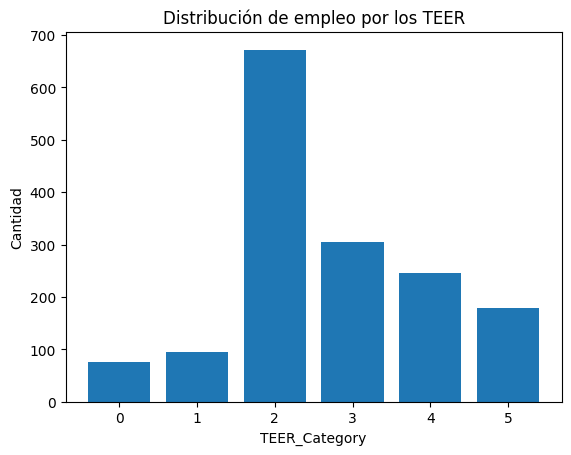

In [377]:
frecuencias= pd.DataFrame(df["TEER_Category"].value_counts())
display(frecuencias)
frecuencias   ## Valores a graficar
plt.bar(list(frecuencias.index),frecuencias["TEER_Category"])
plt.title("Distribución de empleo por los TEER")
plt.xlabel('TEER_Category')
plt.ylabel('Cantidad')


Diagrama de barras tipo de educación necesario para el trabajo con labels

,educacion
\n\n\nSecondary (high) school graduation certificate\n\n,262
"\n\n\nNo degree, certificate or diploma\n\n",58
\n\n\nCollege/CEGEP\n\n,48
\n\n\nBachelor's degree\n\n,14
\n\n\nOther trades certificate or diploma\n\n,8
"\n\n\nNo degree, certificate or diploma\n\n\n\nFull time enrollment\n\n",4
"\n\n\nCollege, CEGEP or other non-university certificate or diploma from a program of 1 year to 2 years\n\nor equivalent experience\n",4
\n\n\nOther trades certificate or diploma\n\nor equivalent experience\n,4
\n\n\nCollege/CEGEP\n\nor equivalent experience\n,4
\n\n\nSecondary (high) school graduation certificate\n\nor equivalent experience\n,4


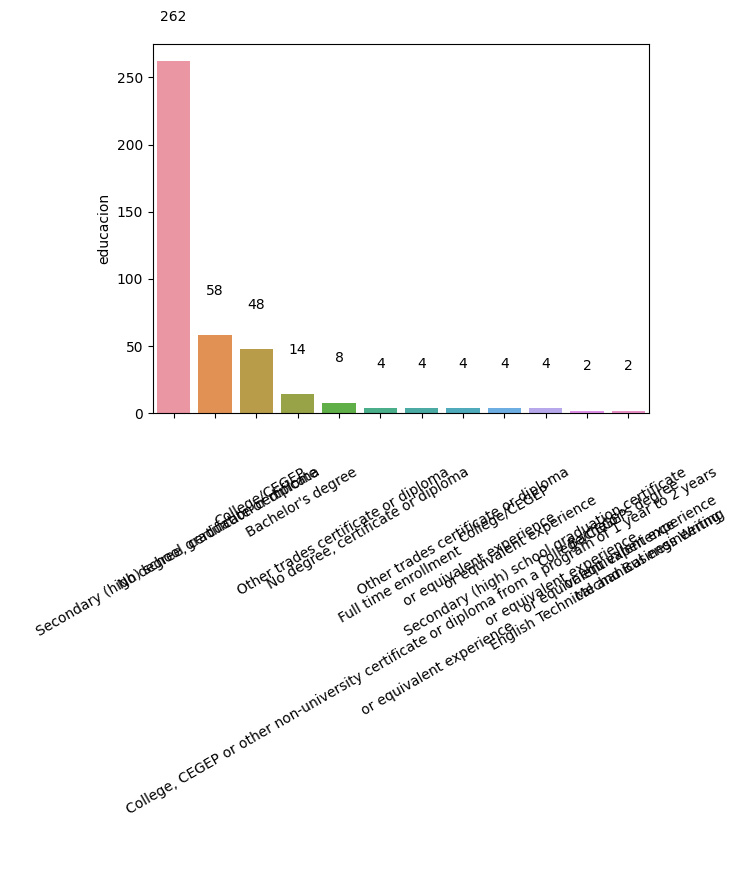

In [378]:
Tabla=pd.DataFrame(df["educacion"].value_counts())
display(Tabla)
ax=sns.barplot(x=Tabla.index.to_list(), y=Tabla.columns.to_list()[0],data=Tabla)
for p in ax.patches:
  height = int(p.get_height())
  ax.text(p.get_x()+p.get_width()/2,height + 30,
            '{:1.0f}'.format(height),
            ha="center")
  plt.xticks(rotation=30) ## Rotación del texto

Diagrama de barras horizontal experiencia con labels

,experiencia
1.0,1391
2.0,126


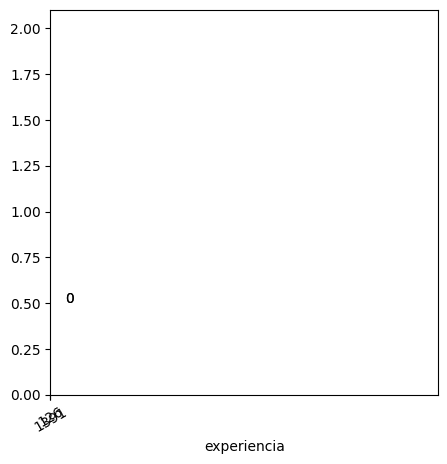

In [379]:
plt.figure(figsize=(5,5), dpi=100)
Tabla=pd.DataFrame(df["experiencia"].value_counts())
display(Tabla)
ax=sns.barplot(x=Tabla.columns.to_list()[0], y=Tabla.index.to_list(),data=Tabla)
plt.xlim(0,22000)
for p in ax.patches:
    width = int(p.get_width())
    ax.text(width+1100,p.get_y()+0.5,
            '{:1.0f}'.format(width),
            ha="center")
    plt.xticks(rotation=30)

,idioma
English,1561
English or French,7
French,2


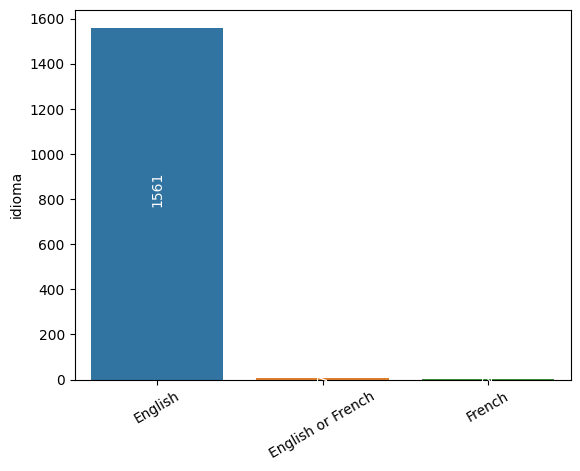

In [380]:
#Gráfico para estrato con labels
Estrato=pd.DataFrame(df["idioma"].value_counts())
display(Estrato)
ax=sns.barplot(x=Estrato.index.to_list(), y=Estrato.columns.to_list()[0],data=Estrato)
for p in ax.patches:
  height = int(p.get_height())
  ax.text(p.get_x()+p.get_width()/2,height/2,
            '{:1.0f}'.format(height),
            ha="center",rotation=90,color='white')
  plt.xticks(rotation=30) ## Rotación del texto

#### **Diagrama de torta**

ON    558
BC    381
AB    234
SK    150
QC    114
NS     34
NB     32
MB     32
PE     19
YT      8
NL      8
Name: locacion, dtype: int64

Text(0, 0.5, '')

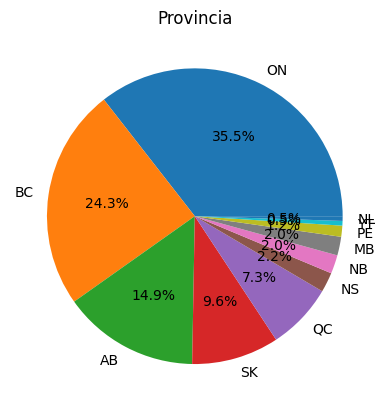

In [381]:
Tabla = df["locacion"].value_counts()
display(Tabla)
Tabla.plot.pie(autopct="%.1f%%")
plt.title("Provincia")
plt.ylabel('')

#### **Tablas de contingencia**
Cruce de variables cualitativas

In [382]:
#Frecuencias absolutas
pd.crosstab(df.locacion,df.educacion,margins=True)

educacion,\n\n\nBachelor's degree\n\n,\n\n\nBachelor's degree\n\nor equivalent experience\nMechanical engineering\n,"\n\n\nCollege, CEGEP or other non-university certificate or diploma from a program of 1 year to 2 years\n\nor equivalent experience\n",\n\n\nCollege/CEGEP\n\n,\n\n\nCollege/CEGEP\n\nor equivalent experience\n,\n\n\nCollege/CEGEP\n\nor equivalent experience\nEnglish Technical and Business Writing\n,"\n\n\nNo degree, certificate or diploma\n\n","\n\n\nNo degree, certificate or diploma\n\n\n\nFull time enrollment\n\n",\n\n\nOther trades certificate or diploma\n\n,\n\n\nOther trades certificate or diploma\n\nor equivalent experience\n,\n\n\nSecondary (high) school graduation certificate\n\n,\n\n\nSecondary (high) school graduation certificate\n\nor equivalent experience\n,All
locacion,,,,,,,,,,,,,
AB,0,0,4,4,0,0,9,0,0,0,36,0,53
BC,4,0,0,20,0,0,14,0,8,4,85,4,139
MB,0,0,0,0,0,0,3,0,0,0,0,0,3
NB,0,0,0,0,0,0,0,0,0,0,8,0,8
NS,4,0,0,0,0,0,0,4,0,0,0,0,8
ON,4,2,0,8,4,2,13,0,0,0,24,0,57
PE,0,0,0,0,0,0,11,0,0,0,0,0,11
QC,0,0,0,0,0,0,2,0,0,0,7,0,9
SK,2,0,0,16,0,0,6,0,0,0,102,0,126


In [383]:
#Frecuencias relativas
round(pd.crosstab(df.locacion,df.idioma,margins=True)/min(df.locacion.count(),df.idioma.count())*100,2)

idioma,English,English or French,French,All
locacion,,,,
AB,14.90,0.00,0.00,14.90
BC,24.27,0.00,0.00,24.27
MB,2.04,0.00,0.00,2.04
NB,2.04,0.00,0.00,2.04
NL,0.51,0.00,0.00,0.51
NS,2.17,0.00,0.00,2.17
ON,35.54,0.00,0.00,35.54
PE,1.21,0.00,0.00,1.21
QC,6.69,0.45,0.13,7.26


In [384]:
# Frecuencias relativas filas
round(pd.crosstab(df.locacion, df.vacantes
           ).apply(lambda r: r/r.sum(),
                                axis=1)*100,2)

vacantes,1.0
locacion,
AB,100.0
BC,100.0
MB,100.0
NB,100.0
NL,100.0
NS,100.0
ON,100.0
PE,100.0
QC,100.0


##### **Gráfica del cruce de variables**

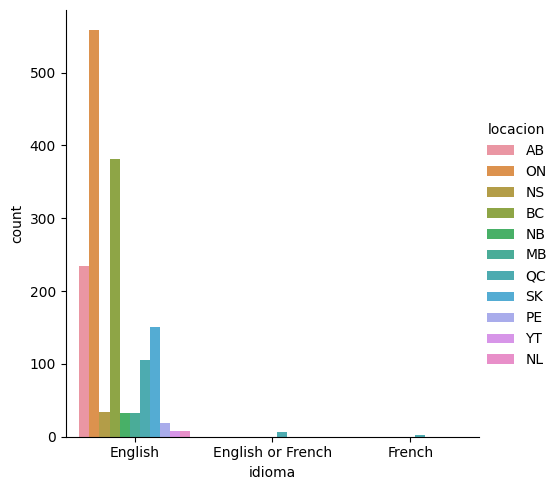

In [385]:
sns.catplot(x="idioma", kind="count", hue="locacion", data=df)

In [386]:
df.columns

Index(['titulo', 'NOC', 'fecha_post', 'compania', 'locacion', 'salario',
       'tipo_contrato', 'vacantes', 'JobBank_id', 'idioma', 'educacion',
       'experiencia', 'responsabilidades', 'links_secciones',
       'Provincia - Territorio', 'Poblacion 2016',
       '% aproximado de la poblacion nacional',
       'Densidad de poblacion (hab - hm2)', 'Salario Min', 'Desempleo %',
       'Puestos de trabajo', 'TEER_Category', 'Class_title',
       'Occupation_types'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

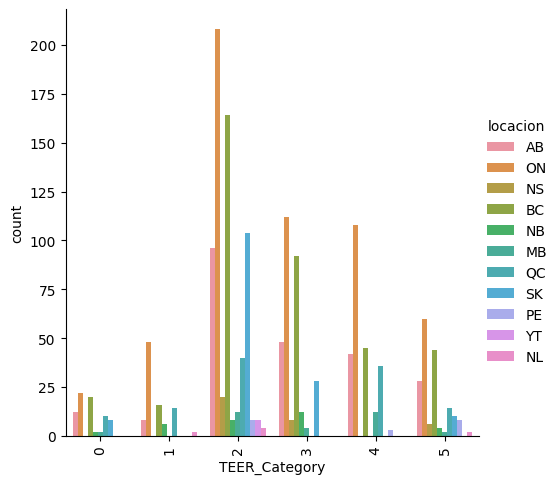

In [387]:
sns.catplot(x="TEER_Category", kind="count", hue="locacion", data=df)
plt.xticks(rotation=90)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


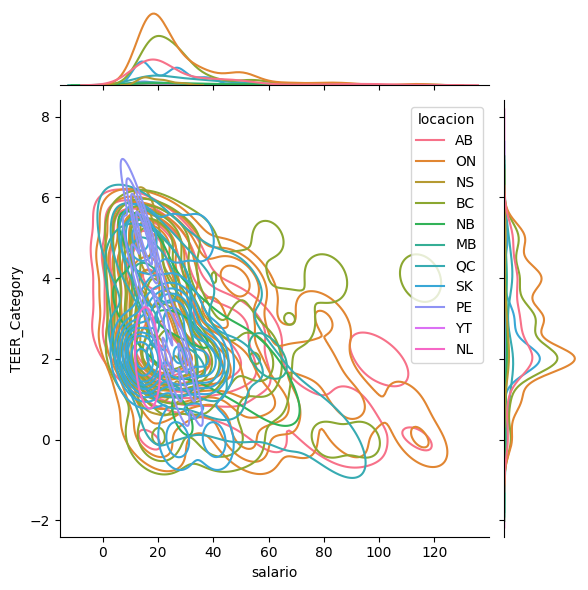

In [388]:
sns.jointplot(
    data=df,
    x="salario", y='TEER_Category', hue="locacion",
    kind="kde"
)

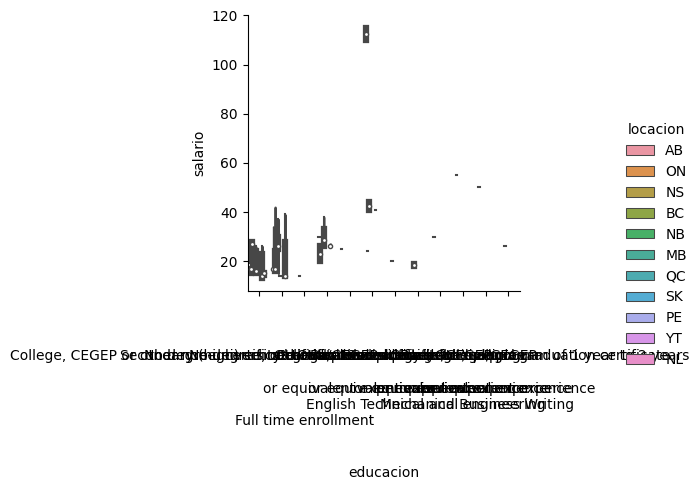

In [389]:
sns.catplot(x="educacion", y="salario", hue="locacion",
            kind="violin", bw=.15, cut=0,
            data=df)

In [390]:
sns.catplot(x='idioma', y="salario", kind="vacante",
            data=df[df.salario<50])

ValueError: ignored